# amie tutorial
Welcome to the amie tutorial. This will tell you everything you need to know to get started with amie.

# 1. Install the client
Go to ... and use:

In [ ]:
pip install amieci

## 1. Loging in

Has to be fixed with the API key thingy... 
Go to app.amie.ai and register to create your account. Under 'settings' you get your API key which you use to log in

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import amieci
url = "https://9453a694-bd17-412a-9c9b-staging.app.amie.ai/api"
url_local = "http://localhost:8080/api"
garden = amieci.Garden("aaaaaa", "anders@wine.com", url_local)

All your data lives in a garden, this corresponds to the infinite canvas in the app. Your garden contains all of your trees and trees that are shared with you.

## 2. Add data
In amie data lives in leaves, which are part of a tree. All trees are in your garden. A tree contains connected data. Leaves can have parents and children. Children inherit metaparametes from their parents. You can also make branches to explore different avenues and keep everything structured.

### 2.1 Garden, Trees, leaves

In [6]:
garden.new_tree()

The new tree will automatically become your current tree, and you can access it with:

In [7]:
garden.ct

To navigate easier, you can also stick it into a variable

In [8]:
tree = garden.new_tree()

You have to give it a title and a description:

In [9]:
tree.set_title("My first tree")
tree.set_description("Learning amieci")

You save and upload your tree to amie with: 

In [10]:
tree.save()

Now you can add your first leaf to the tree:

In [11]:
tree.new_leaf()

As with the tree, the garden tracks the leaf you are working on in the current leaf:

In [12]:
garden.ct.cl

Lust like the tree:

In [13]:
tree.cl

As before, you can stick it into a variable:

In [14]:
leaf = tree.cl

You add a title and a description with the ```.set_title``` and ```.set_description``` commands. You can also append the description with ```.append_description``` and insert into the beginning of the description with ```.insert_description```. You access title and description with ```.description``` and ```.title```.

In [15]:
leaf.set_title("My first leaf")
leaf.set_description("learning amie")
leaf.append_description("..this is fun")
leaf.insert_description("Today I'm ... : ")
leaf.description

"Today I'm ... : \nlearning amie\n..this is fun"

You save your leaf, just like the tree with ```.save()```.

In [16]:
leaf.save()

Now you can go to the app and see your first tree, with it's first leaf.

To make a new leaf in the same tree, you use ```.new_leaf()``` again:

In [17]:
leaf_2 = tree.new_leaf()

This leaf will automatically be a child of the previous leaf.

### 2.2 Tracking parameters

You can track parameters in the leaves as key values. They are added in the leaves under ```.kvs```

In [19]:
leaf_2.kvs.add('temperature', 10)

You can then access them quickly with the ```leaf.kvs.``` notation:

In [20]:
leaf_2.kvs.temperature

'10'

You can also add a full dictionary:

In [21]:
params = {'humidity' : 20, 'pressure' : 100}
leaf_2.kvs.load_from_dict(params)

You can use the app to quickly visualise parameters. Let's save, add a new leaf and update the parameters:

In [22]:
leaf_2.set_title("First kvs")
leaf_2.set_title("Added the first kvs")
leaf_2.save()

In [23]:
leaf_3 = tree.new_leaf()

In [26]:
params = {'humidity' : 20, 'pressure' : 100, 'temperature' : 100}
leaf_3.kvs.load_from_dict(params)
leaf_3.save()

Now you can go to the app and inspect your parameters. They will show up on the bottom of the page. If you click on them, their previous values will be displayed next to the leaves in the graphview to the left.

You can also plot them. Click on the plot button in the top left of the canvas and select humidity on the x axis. Now the graph will re-arrange to become a plot.

### 2.3 Adding files

Let's make a plot and uplod it:

In [27]:
import numpy
import matplotlib.pyplot as plt

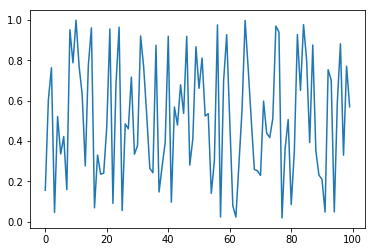

In [31]:
data = numpy.random.rand(100)
fig = plt.figure()
plt.plot(data)
plt.show()

A matplotlib figure is added with with ```.add_plot(filename, fig)``` function. You also have the option to add a caption. The figures will be converted to PNGs, so it's a good idea to add that extension to the filename.

In [32]:
leaf_plot = tree.new_leaf()

In [33]:
leaf_plot.set_title("Leaf with a plot")
leaf_plot.set_description("Now there is a plot")
leaf_plot.add_plot('plot.png', fig, caption="cool")
leaf_plot.save()

Now you can check out the the plot in the app. You can also download it from there or change the caption.

To add an arbitraty file, convert it to bytes and use the ```.add_data(filename, file)``` function:

In [40]:
import pandas as pd

In [41]:
df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=['cats', 'dogs', 'horses', 'pandas'])
df.head()

,cats,dogs,horses,pandas
0,50,34,38,64
1,68,59,95,44
2,42,80,95,21
3,79,60,2,91
4,87,82,38,54


Convert to CSV and add as bytes:

In [42]:
sep = ';'
file = bytes(df.to_csv(sep=sep), 'utf-8')

You can add the separator as a parameter:

In [43]:
leaf_data = tree.new_leaf()
leaf_data.set_title("Leaf with data")
leaf_data.set_description("This is a leaf with data")
leaf_data.add_data("animals.csv", file)
leaf_data.kvs.add('separator', sep)
leaf_data.save()

### 2.4 Branching
So far we have added new leaves as children. This represents the kind of data that builds upon previous data, like a new measurement on the same equipment with new parameters, or optimization steps for a machine learning model. If you are trying a new avenue that does not builds upon an earlier leaf, you can make a branch, by setting the parent of a new leaf to an earlier leaf with ```.new_leaf(parent=*some leaf*)```

In [53]:
leaf_branch = tree.new_leaf(parent=leaf_2)
leaf_branch.set_title("First leaf of a new branch")
leaf_branch.set_description("Now we went back and continued from an older step")
leaf_branch.save()

Go to the app to see the branching.

## 3. Retrieve data
This section shows you how to work with data that is already in amie. Let's assume you come back annother day and want to have a look at the datafiles you just uploaded.
You log in again and load the garden with ```garden.load()```

In [54]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import amieci
url = "https://9453a694-bd17-412a-9c9b-staging.app.amie.ai/api"
url_local = "http://localhost:8080/api"
garden = amieci.Garden("aaaaaa", "anders@wine.com", url_local)
garden.load()

There are several ways to retrieve trees and leaves. It's easiest to just to to the app, use the search function and get the UUIDs of the tree and leaf from there. You can set the current leaf to the leaf you want to work with via ```garden.set_cl(leaf_id)```

In [55]:
garden.set_cl('ce653516-6fad-4c4b-b852-d2c88ca5b52d')

The current tree will also be automatically set.

In [56]:
garden.ct.title

'My first tree'

You can inspect the files with ```leaf.filenames()```:

In [64]:
garden.ct.cl.filenames()

['animals.csv']

The files will not automatically be downloaded. Each leaf only contains a link to the file. Download all files in a leaf with ```leaf.download_data()``` . ```download_data()``` gives you the option to pass the UUID of the file to only download that file or ```python download_data(filename=*substring*)``` to download all files that substringmatch on ```*substring*```:

In [70]:
file = garden.ct.cl.download_data(filename='.csv')

This always returns a list of bytes.

In [71]:
file

Since it is a CSV we use pandas again to load it. Luckily we saved the separator, so we don't have to guess it.

In [72]:
sep = garden.ct.cl.kvs.separator
df = pd.read_csv(file[0], sep=sep, index_col=0)
df.head()

,cats,dogs,horses,pandas
0,50,34,38,64
1,68,59,95,44
2,42,80,95,21
3,79,60,2,91
4,87,82,38,54


## 4. Patterns for automatization
Amie makes automatic documentation part of your workflow. Below you will find some examples of how a **data scientist** and a **chemist** integrate amie into their jupyter scripts.

### 4.1 Data science

Check out a full **data science** workflow with amie [here](https:gist... ) and [here](https:gist... ). It will show you how you can analyze data, develop scikit learn models, and track them together with training data and results.

### 4.2 Measurement equipment

Go [here](https:gist... ) to learn how you integrate amie with your **measurement equipment** to automatically store and document the results.